In [1]:
import numpy as np
import numpy.linalg as lg
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
import illustris_python as il

In [2]:
old_basis = np.identity(3)
v = [-0.74344929, -0.39614756, 0.5388416]
#v = [1,0,0]
v_xy = np.array([v[0], v[1], 0])
theta = np.nan_to_num(np.arccos(np.dot(v/lg.norm(v), old_basis[:, 2]))) #get angle between new z axis and old z axis
phi = np.nan_to_num(np.arccos(np.dot(v_xy/lg.norm(v_xy), old_basis[:, 0]))) #get angle between projected new z axis and old x axis
print(np.degrees(theta), np.degrees(phi))
#Rotate phi radians about z and theta radians about y
r1 = R.from_euler('z', phi)
r2 = R.from_euler('y', -theta)
r3 = r2*r1
r_intr = R.from_euler('zyx', [phi, -theta, 0])
r_ext = R.from_euler('ZYX', [phi, theta, 0])
rot_matrix = np.array(r_intr.as_matrix()) #convert to numpy array

print(np.array(r3.as_matrix()))
print(np.array(r_intr.as_matrix()))
print(np.array(r_ext.as_matrix()))

57.39518380278032 151.94904128964154
[[-4.75543713e-01 -2.53393855e-01 -8.42407106e-01]
 [ 4.70256668e-01 -8.82529697e-01  2.77555756e-17]
 [-7.43449288e-01 -3.96147559e-01  5.38841598e-01]]
[[-4.75543713e-01 -2.53393855e-01 -8.42407106e-01]
 [ 4.70256668e-01 -8.82529697e-01  2.77555756e-17]
 [-7.43449288e-01 -3.96147559e-01  5.38841598e-01]]
[[-4.75543713e-01 -4.70256668e-01 -7.43449288e-01]
 [ 2.53393855e-01 -8.82529697e-01  3.96147559e-01]
 [-8.42407106e-01 -2.77555756e-17  5.38841598e-01]]


In [3]:
test = np.dot(rot_matrix, v)
for i in test:
    print(round(i, 4))

0.0
0.0
1.0


In [4]:
x = [0, 1, 0, 2]
y = [0, 1, 0, 0]
z = [0, 0, 0, 3]

old_positions = np.transpose(np.array([x, y, z])) #get coordinates in vector form
print(old_positions)
new_positions = np.zeros([len(old_positions), 3]) #empty list
for j in range(len(old_positions)): #If this could be done faster, code would improve
    new_positions[j] = np.dot(rot_matrix, np.transpose(old_positions[j]))# r' = Rr

X = new_positions[:, 0]
Y = new_positions[:, 1]
Z = new_positions[:, 2]
print(new_positions)

[[0 0 0]
 [1 1 0]
 [0 0 0]
 [2 0 3]]
[[ 0.          0.          0.        ]
 [-0.72893757 -0.41227303 -1.13959685]
 [ 0.          0.          0.        ]
 [-3.47830874  0.94051334  0.12962622]]


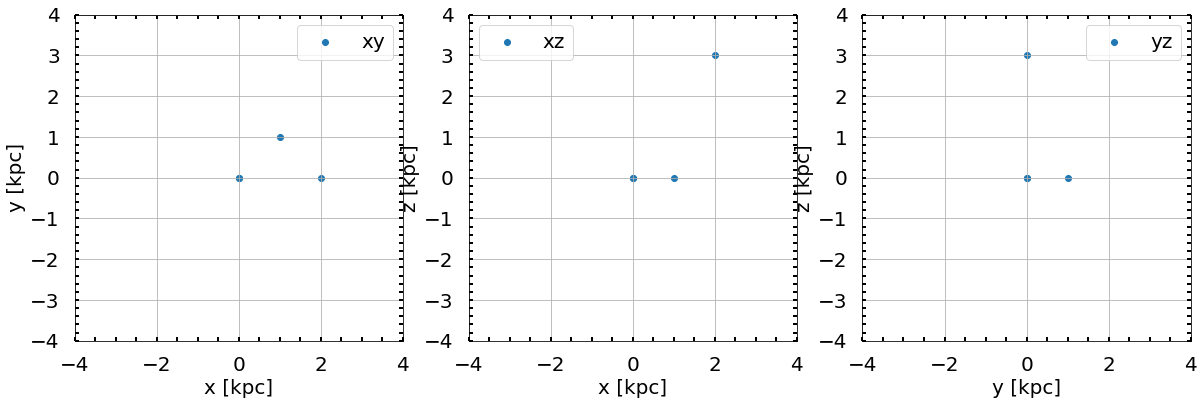

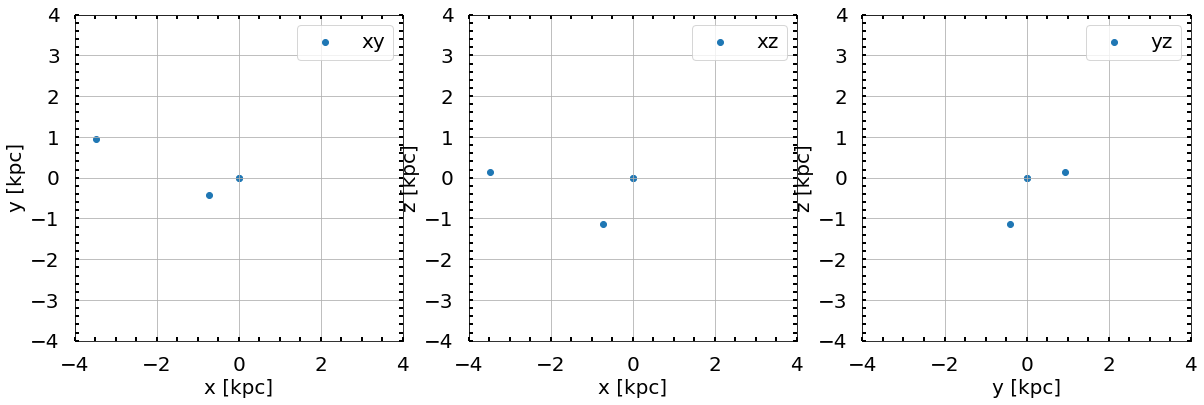

In [5]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(20,6))
axs[0].scatter(x,y, label = "xy")
axs[1].scatter(x,z, label = "xz")
axs[2].scatter(y,z, label = "yz")
il.formatplot.rot_galaxy_map(axs[0], 1, "x", "y")
il.formatplot.rot_galaxy_map(axs[1], 1, "x", "z")
il.formatplot.rot_galaxy_map(axs[2], 1, "y", "z")

fig2, axs2 = plt.subplots(nrows = 1, ncols = 3, figsize=(20,6))
axs2[0].scatter(X,Y, label = "xy")
axs2[1].scatter(X,Z, label = "xz")
axs2[2].scatter(Y,Z, label = "yz")
il.formatplot.rot_galaxy_map(axs2[0], 1, "x", "y")
il.formatplot.rot_galaxy_map(axs2[1], 1, "x", "z")
il.formatplot.rot_galaxy_map(axs2[2], 1, "y", "z")
